# CNN LeNet-5 #
## ** CNN example: ** ##
Adding convolutional layers to MSIST example:
* 1- One CNN layer with 32 filters, 3 * 3 kernel, Relu activation,  28 * 28 pixels
    Stride: default = 1
    Padding: default: no padding ('valid')
    
    Activation map = $ \frac{(D - F + 2P)}{S} + 1 $
    
    
    D: size of image = 28
    F: size of the filter = 3
    P: amount of padding = 0
    S: Stride = 1
    Activation Map = $ ((28 - 3 + 2*0) / 1) + 1) = 26 $
 
    Output: $ 26 * 26 * 32 $

    Params: 1 filter = 3 *3 = 9 weights
            32 filters => 9 * 32 = 288
            32 biases
            Total params = 320

* 2- One CNN layer with 64 filters, 3 * 3 kernel, Relu activation
    Input: 26 * 26 * 32
    Activation Map =  $ \frac{26 - 3 + 2*0}{1} + 1 = 24 $

    Output = 24 *24 * 64 

    Params: 1 filter = 9 weights
    64 filters: 64 * 9 
    each receives 32 from last layer
    Total weights = 64 *9 *32 = 18432
    biases = 64
    Total params: 18496

* 3- Max Pooling Layer: 
    Pool size = 2 * 2
    Stride: default is same as pool size
    Activation Map = 24 / 2 
    (24 size of input divided by pool size)

    Output = 12 * 12 * 64 

* 4- Flatten layer
    Input: 12 *12 * 64
    Flattens to 12 * 12 * 64 = 9216

* 5- One dense layer with 128 units
    Output 128 

    #Params = 9216 * 128 + 128 (Input = 9216, units = 128, biases = 128)
            = 1 179 776

* 6- One output layer, 10 units, Softmax
    Output: 10 probabilties
    #Params = 10 * 128 + 10 = 1290
 

## Results:##
   loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.0623 - val_accuracy: 0.9910

Import packages

In [2]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

#Batch Norm
from tensorflow.keras.layers import BatchNormalization

# import regularizer
from tensorflow.keras import regularizers  

#Dropout
from tensorflow.keras.layers import Dropout

#CNN 
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


In [4]:
print(X_train.shape)


(60000, 28, 28)


In [5]:
print(y_train.shape)

(60000,)


In [6]:
print(X_valid.shape)
print(y_valid.shape)

(10000, 28, 28)
(10000,)


Process & Prepare data
Reshaping input data:
Input data (x_train[i]) should not be converted to a vector. Is must stay as 60000 of images (28 *28)
- From shape (60000, 28, 28) to shape (60000, 28, 28, 1)
- Last dimension 1 : value of the pixel (monochrome). If it was color image, it would be 3
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [7]:
#use numpy reshape
x_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
x_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
print(x_train.shape)
print(x_valid.shape)
print(x_train[0][0][21][0])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
0.0


Prepare Data (2)
divide by 255, so the values will range from 0 to 1


Prepare labels (y_train and y_valid)
y_train[i] is given as a number (0, 9). We have 10 possible values. 
Convert to one-hot format:
0 => [1, 0, 0, 0, 0,0, 0,0, 0,0]
1 => [0, 1, 0, 0, 0,0, 0,0, 0,0]
9 => [0, 0, 0, 0, 0,0, 0,0, 0,1]

In [9]:
n_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, n_classes)
print(y_train[0])

print(y_valid[0])
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_valid[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [10]:
#Define activations
relu = keras.activations.relu
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
tf.print(sgd.lr)


0.1


In [11]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [12]:
#define First Convolutional layer
nbFilters_1 = 32 #Filters for first layer
kernel_size = (3, 3)
input_shape=(28,28,1)

layer1 = Conv2D(nbFilters_1,   kernel_size=kernel_size, activation=relu, input_shape=input_shape)
# No Pooling layer


In [13]:
#define Second Convolutional layer
nbFilters_2 = 64 #Filters for first layer
kernel_size = (3, 3)

layer2 = Conv2D(nbFilters_2,   kernel_size=kernel_size, activation=relu)


In [14]:
# Add Pooling layer
pool_size=(2,2)
poolingLayer=MaxPool2D(pool_size=pool_size)


In [15]:
#Add dense layer 
denseLayer= Dense(128, activation=relu)

#Add outputLayer=
outputLayer = Dense(n_classes, activation=softmax)

In [16]:
#Compose Model
model.add(layer1) #Convolutional
model.add(layer2) #Convolutional

model.add(poolingLayer) # Pooling Layer (Max)

model.add(Dropout(0.25)) #Dropout 25%

# Important : Flatten the output so as to add a dense layer
# Dense layer must have a flattened inpit (vector of scalars)
model.add(Flatten())

#Dense layer with dropout
model.add(denseLayer)
model.add(Dropout(0.5))

# Output layer
model.add(outputLayer)


In [17]:
#compile Model
model.compile(loss=loss, 
         optimizer='adam', #sgd,
         metrics=['accuracy'])

In [18]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

TensorBoard

In [19]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
folder="logs/first_2_cnn_1_dense"
if not os.path.exists(folder):
   os.mkdir(folder)
log_dir = folder + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/first_2_cnn_1_dense/20200315-183015


In [20]:
# Train
batch_size = 128
nb_epoch = 20
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.8876 - accuracy: 0.8647 - val_loss: 0.0754 - val_accuracy: 0.9776
Epoch 2/20
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1553 - accuracy: 0.9545 - val_loss: 0.0559 - val_accuracy: 0.9827
Epoch 3/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1171 - accuracy: 0.9656 - val_loss: 0.0508 - val_accuracy: 0.9847
Epoch 4/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0968 - accuracy: 0.9708 - val_loss: 0.0464 - val_accuracy: 0.9869
Epoch 5/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 6/20
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0746 - accuracy: 0.9779 - val_loss: 0.0457 - val_accuracy: 0.9863
Epoch 7/20
60000/60000 [==============================] 

Save Model

In [21]:
# serialize model to JSON
print(log_dir)
model_json = model.to_json()
with open(log_dir + "/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save(log_dir + "/model_all.h5")

logs/first_2_cnn_1_dense/20200315-183015


Plot History

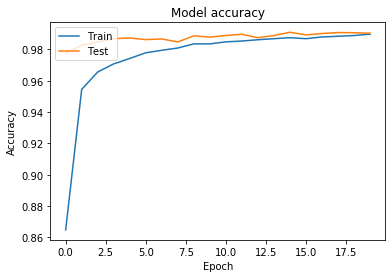

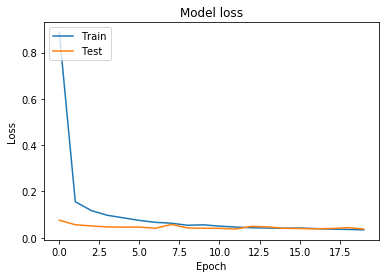

In [25]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [24]:
json = model.to_json()
tf.print(json)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": 

End